# Importing libs

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exploring the data 

In [121]:
data = pd.read_csv(
    "insurance.csv",
)

In [122]:
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [123]:
data.isna().sum()

X    0
Y    0
dtype: int64

In [124]:
data.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


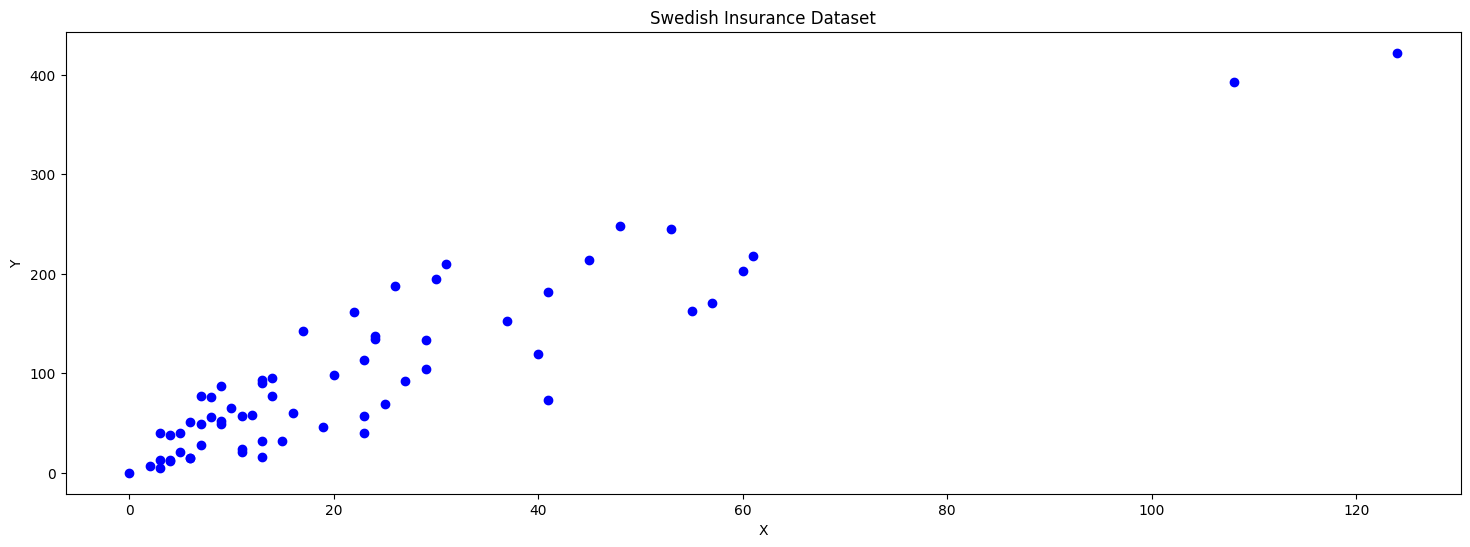

In [125]:
length = len(data["X"])

x = data["X"]
y = data["Y"]

plt.figure(figsize=(18, 6))  # Adjust the figure size as per your requirement
plt.plot(x, y, "o", color="blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Swedish Insurance Dataset")
# plt.savefig("./figures/insurance.png", transparent=True)
plt.show()

# Approaching the problem
### Main idea
We want to draw a line that will fit the data. To be specific, to measure the error or how good the line fits our data, we want to take the distances of each datapoint to the line and sum it up. But we may encounter the problem that the points from the opposite side of the line may complement each other and make the measurement not good or not bad as it truly is.

Therefore, we want to square up the distances (or residuals) to ensure the values we calculate are always positive. Taking the absolute values of the differences were also considered but it made the math tricky. 

In conclusion, the main objective is to find $a$ and $b$ of line $y = ax+b$ so that the sum of squared residuals is minimal.

### Updating the line
To update the line, we need to adjust $a$ and $b$ as said above by taking the partial derivative of a loss function with respect to $a$ and $b$, respectively. By that, the direction of the line can be determined and tuned to fit the data. That loss function is simply the function of calculating the sum of squared residual we discussed above.

The sum of squared residual equation can be written as:

$$E = \sum_{i=0}^{n}(y_i-(ax_i+b))^2$$

But here I want to try implement the mean squared error (MSE) as it is widely used in ML problems and also, it is not much different than the sum of squared error as we take the average of it. Therefore, the loss function we want to implement is

$$E = \frac{1}{n}\sum_{i=0}^{n}(y_i-(ax_i+b))^2$$

Now let's calculate the partial derivates of the loss function:

$$\frac{dE}{da} = \frac{1}{n}\sum_{i=0}^{n}2(y_i-(ax_i+b))(-x_i) = \frac{-2}{n}\sum_{i=0}^{n}(-x_i)(y_i-(ax_i+b))$$

$$\frac{dE}{dba} = \frac{1}{n}\sum_{i=0}^{n}2(y_i-(ax_i+b))(-1) = \frac{-2}{n}\sum_{i=0}^{n}(y_i-(ax_i+b))$$

After that, we want to update the $a$ and $b$ by

$$a = a-L\frac{dE}{da}$$
$$b = b-L\frac{dE}{db}$$

This is because the derivative we calculated is the direction that line is going but we don't want to go in that direction, in fact, we want to go to the opposite as we are heading for when the derivative is equal to 0 (minimal). Hence, the subtraction.

Also, we don't want to change too much in one iteration, so we added L which is the learning rate. It basically limit the range when adjust the line. The larger the rate is, the faster we get to the optimal point. However, it may overshoot the point and maybe can never reach it. But if the rate is too small, the learning process will take a lot of time. So we want that to be in between.

In [126]:
def MSE(a, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].x
        y = points.iloc[i].y
        total_error += (y - (a * x + b)) ** 2
    return total_error / len(points)

# Actual coding

In [145]:
def gradient_descent(current_a, current_b, points, learning_rate):
    a_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y

        a_gradient += (-2 / n) * (x) * (y - (current_a * x + current_b))
        b_gradient += (-2 / n) * (y - (current_a * x + current_b))

    a = current_a - learning_rate * a_gradient
    b = current_b - learning_rate * b_gradient

    return a, b

3.82256847556231 1.0644244601763335


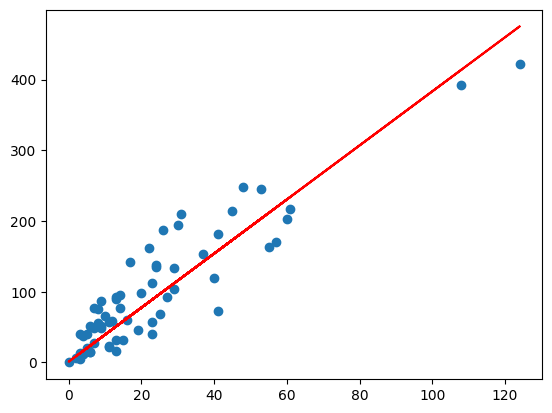

In [162]:
# Create a dataframe with columns x and y above
df = pd.DataFrame({"x": x, "y": y})

# Init the first line
a = 0
b = 0
learning_rate = 0.0001
epochs = 500

for i in range(epochs):
    # print(f"Epoch: {i}")
    a, b = gradient_descent(a, b, df, learning_rate)

print(a, b)

plt.scatter(df["x"], df["y"])
plt.plot(df["x"], a * df["x"] + b, color="red")
plt.show()